In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
data = pd.read_csv('survey.csv')
data.head()
+

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
data = pd.read_csv('survey.csv')
data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [7]:
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame


,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [8]:
data['work_interfere'].unique()


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

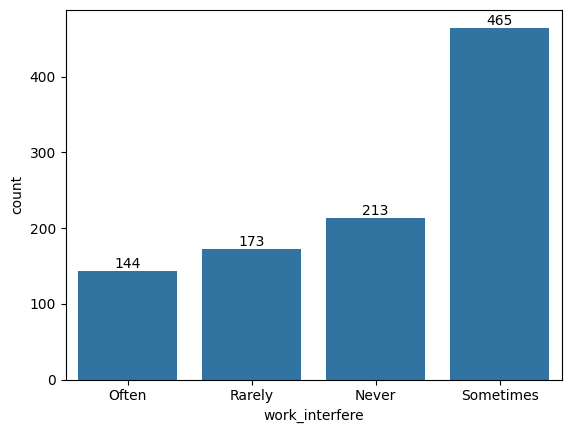

In [9]:
#Plot **work_interfere**
ax = sns.countplot(data = data , x = 'work_interfere');
#Add the value of each parametr on the Plot
ax.bar_label(ax.containers[0]);

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np
columns_to_drop = ['state', 'comments', 'Timestamp']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(columns=[column])


# Fill in missing values in work_interfere column
data['work_interfere'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['work_interfere'].values.reshape(-1,1)))
data['self_employed'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['self_employed'].values.reshape(-1,1)))

data.head()



,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


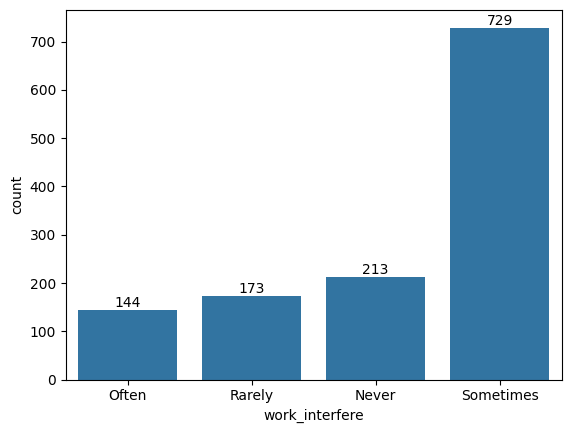

In [18]:
ax = sns.countplot(data=data, x='work_interfere');
ax.bar_label(ax.containers[0]);

In [19]:

#Check unique data in gender columns
print(data['Gender'].unique())
print('')
print('-'*75)
print('')
#Check number of unique data too.
print('number of unique Gender in our dataset is :', data['Gender'].nunique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

---------------------------------------------------------------------------

number of unique Gender in our dataset is : 49


In [20]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                        'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

print(data['Gender'].unique())

['Female' 'Male' 'Other']


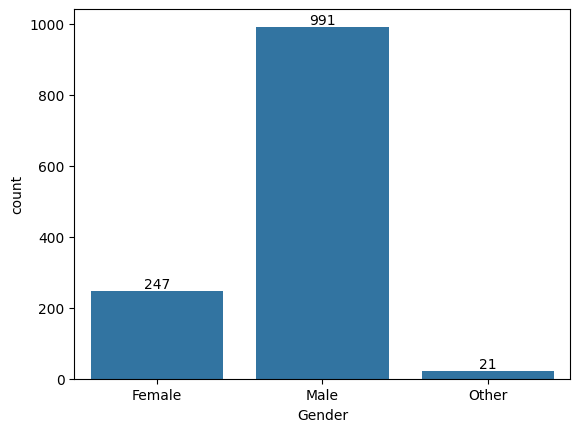

In [21]:
#Plot Genders column after cleaning and new categorizing
ax = sns.countplot(data=data, x='Gender');
ax.bar_label(ax.containers[0]);

In [22]:
#Our data is clean now ? let's see.
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [24]:
#Let's check duplicated data.
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)
    
print('-'*50)
print(data.duplicated().sum())

There is no duplicated data:
--------------------------------------------------
0


In [25]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [26]:
#We had a lot of nonsense answers in the Age column too
#This filtering will drop entries exceeding 100 years and those indicating negative values.
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

print(data['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


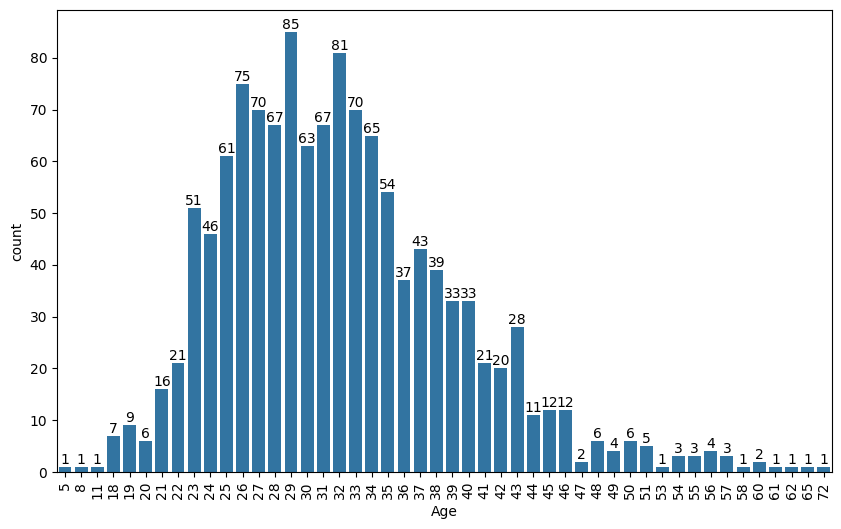

In [27]:
#Let's see the Age distribution in this dataset.
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);

<Figure size 1000x600 with 0 Axes>

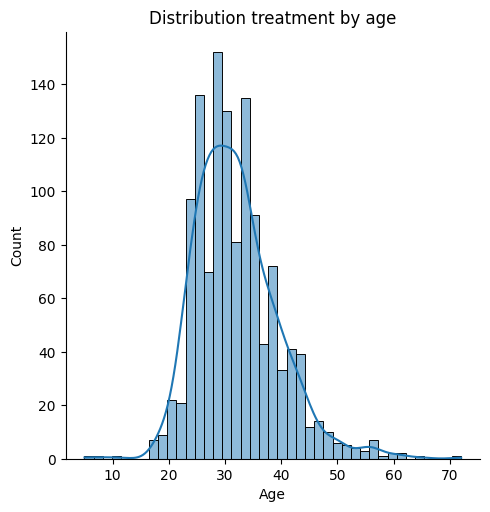

In [28]:
#In this plot moreover on Age distribution we can see treatment distribution by age
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');

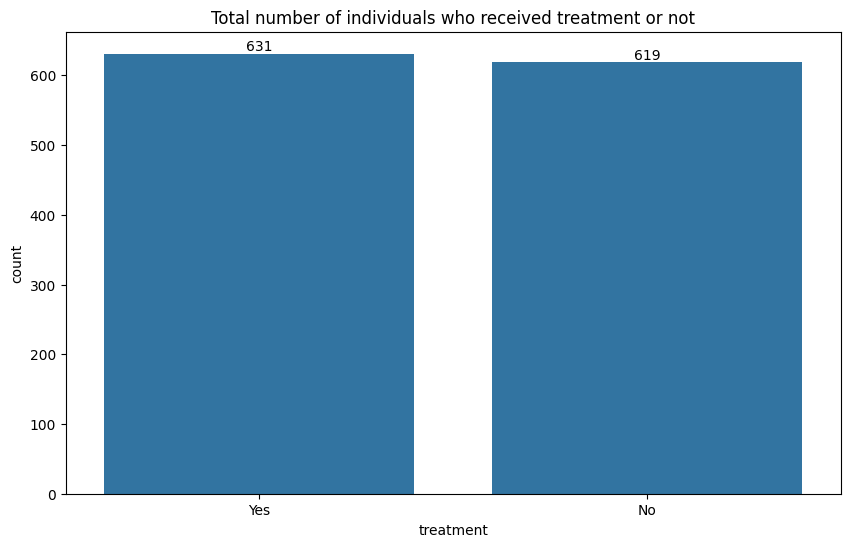

In [29]:
#In this plot We can see Total number of individuals who received treatment or not.
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');


In [30]:
#Check Dtypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1250 non-null   int64 
 1   Gender                     1250 non-null   object
 2   Country                    1250 non-null   object
 3   self_employed              1250 non-null   object
 4   family_history             1250 non-null   object
 5   treatment                  1250 non-null   object
 6   work_interfere             1250 non-null   object
 7   no_employees               1250 non-null   object
 8   remote_work                1250 non-null   object
 9   tech_company               1250 non-null   object
 10  benefits                   1250 non-null   object
 11  care_options               1250 non-null   object
 12  wellness_program           1250 non-null   object
 13  seek_help                  1250 non-null   object
 14  anonymity    

In [31]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1250 non-null   int64
 1   Gender                     1250 non-null   int32
 2   Country                    1250 non-null   int32
 3   self_employed              1250 non-null   int32
 4   family_history             1250 non-null   int32
 5   treatment                  1250 non-null   int32
 6   work_interfere             1250 non-null   int32
 7   no_employees               1250 non-null   int32
 8   remote_work                1250 non-null   int32
 9   tech_company               1250 non-null   int32
 10  benefits                   1250 non-null   int32
 11  care_options               1250 non-null   int32
 12  wellness_program           1250 non-null   int32
 13  seek_help                  1250 non-null   int32
 14  anonymity                  12

In [32]:
#Let's check Standard deviation 
data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1250.00000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,32.02400,0.81760,37.792800,0.114400,0.390400,0.504800,2.128000,2.786400,0.298400,0.820000,...,0.648000,1.410400,0.849600,0.830400,0.973600,1.100800,0.868800,0.716000,0.814400,0.14480
std,7.38408,0.42388,13.334981,0.318424,0.488035,0.500177,1.165806,1.738733,0.457739,0.384341,...,0.909482,1.509634,0.766453,0.485205,0.620009,0.843806,0.425831,0.723715,0.835051,0.35204
min,5.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.00000,1.00000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,31.00000,1.00000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
75%,36.00000,1.00000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.00000
max,72.00000,2.00000,46.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000


In [33]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])

data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1250.000000,1250.00000,1.250000e+03,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1250.000000,1250.000000,...,1250.000000,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,0.444778,0.81760,3.979039e-17,0.114400,0.390400,0.504800,-1.193712e-16,-1.705303e-17,0.298400,0.820000,...,0.648000,-8.810730e-17,0.849600,0.830400,0.973600,1.100800,0.868800,0.716000,0.814400,0.14480
std,0.102557,0.42388,1.000400e+00,0.318424,0.488035,0.500177,1.000400e+00,1.000400e+00,0.457739,0.384341,...,0.909482,1.000400e+00,0.766453,0.485205,0.620009,0.843806,0.425831,0.723715,0.835051,0.35204
min,0.069444,0.00000,-2.835244e+00,0.000000,0.000000,0.000000,-1.826077e+00,-1.603187e+00,0.000000,0.000000,...,0.000000,-9.346401e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.375000,1.00000,3.156273e-01,0.000000,0.000000,0.000000,-9.679583e-01,-1.027826e+00,0.000000,1.000000,...,0.000000,-9.346401e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,0.430556,1.00000,5.406895e-01,0.000000,0.000000,1.000000,7.482798e-01,1.228972e-01,0.000000,1.000000,...,0.000000,-2.719628e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
75%,0.500000,1.00000,5.406895e-01,0.000000,1.000000,1.000000,7.482798e-01,6.982587e-01,1.000000,1.000000,...,2.000000,3.907145e-01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.00000
max,1.000000,2.00000,6.157103e-01,1.000000,1.000000,1.000000,7.482798e-01,1.273620e+00,1.000000,1.000000,...,2.000000,1.716069e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000


In [34]:
from sklearn.model_selection import train_test_split

#I wanna work on 'treatment' column.
X = data.drop(columns = ['treatment'])
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)

(937, 23) (937,)
------------------------------
(313, 23) (313,)
______________________________


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

In [36]:
steps_rfc = [('Scaler', StandardScaler()),
             ('clf', RFC(n_estimators = 40))]



clf_rfc = Pipeline(steps=steps_rfc)


clf_rfc.fit(X_train, y_train)

y_pred_rfc = clf_rfc.predict(X_test)
print('RFC accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfc)*100)

RFC accuracy:  71.24600638977637


In [37]:
steps_knn = [('Scaler', StandardScaler()),
             ('clf', KNN(n_neighbors = 5))]



clf_knn = Pipeline(steps=steps_knn)


clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
print('KNN accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_knn)*100)

KNN accuracy : 62.30031948881789


In [38]:
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]



clf_svc = Pipeline(steps=steps_svc)


clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 69.6485623003195


In [39]:

steps_dt = [('Scaler', StandardScaler()),
             ('clf', DT())]



clf_dt = Pipeline(steps=steps_dt)


clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
print('DT accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_dt)*100)

DT accuracy : 61.66134185303515
